# Setup

In [134]:
# Import python packages
import xarray as xr #to read file, alter file
import matplotlib as mpl # plotting
import matplotlib.pyplot as plt # plotting

import numpy as np
import math
# import time
from datetime import datetime as dt

# # Cartopy imports
import cartopy.crs as ccrs # map projections
# import cartopy.feature as cfeature # features (eg. borders, lakes)
from cartopy import util as cutil # useful for contourf plots
# import cartopy.mpl.ticker as cticker # formatting ticks to be lat/lon

from matplotlib import animation
import warnings
# plt.close('all')

In [135]:
plt.close('all')

In [3]:
# Loading in dataset: (duplicate cell for multiple datasets, and change variable name)

path = 'H:\\Summer24-25\\' ##### enter file path here ---> double slashes or change direction eg. \ --> \\ or / #####
name = '*_Amon_CESM2-WACCM_ssp126*.nc' ##### enter file name here --> use * if need multiple files/versions per dataset #####
with warnings.catch_warnings():
    warnings.simplefilter('ignore') # some datasets have empty values, so ignore that warning--> if gives error, remove this to check
    ds = xr.open_mfdataset(path+name, parallel=True)

ds.plev # see summary of data

<xarray.DataArray 'plev' (plev: 19)> Size: 152B
array([100000.,  92500.,  85000.,  70000.,  60000.,  50000.,  40000.,  30000.,
        25000.,  20000.,  15000.,  10000.,   7000.,   5000.,   3000.,   2000.,
         1000.,    500.,    100.])
Coordinates:
  * plev     (plev) float64 152B 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
Attributes:
    axis:           Z
    positive:       down
    requested:      100000. 92500. 85000. 70000. 60000. 50000. 40000. 30000. ...
    standard_name:  air_pressure
    title:          pressure
    type:           double
    units:          Pa

In [4]:
# changing units of ds.plev. Pa--> hPa **only use if needed**

ds['plev'] = ds.plev / 100
ds.plev.attrs['axis'] = 'Z'
ds.plev.attrs['positive'] = 'down'
ds.plev.attrs['requested'] = '1000. 925. 850. 700. 600. 500. 400. 300. 250. 200. 150. 100. 70. 50. 30. 20. 10. 5. 1.'
ds.plev.attrs['standard_name'] = 'air_pressure'
ds.plev.attrs['title'] = 'pressure'
ds.plev.attrs['type'] = 'double'
ds.plev.attrs['units'] = 'hPa'
ds.plev

<xarray.DataArray 'plev' (plev: 19)> Size: 152B
array([1000.,  925.,  850.,  700.,  600.,  500.,  400.,  300.,  250.,  200.,
        150.,  100.,   70.,   50.,   30.,   20.,   10.,    5.,    1.])
Coordinates:
  * plev     (plev) float64 152B 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
Attributes:
    axis:           Z
    positive:       down
    requested:      1000. 925. 850. 700. 600. 500. 400. 300. 250. 200. 150. 1...
    standard_name:  air_pressure
    title:          pressure
    type:           double
    units:          hPa

# Selecting data:

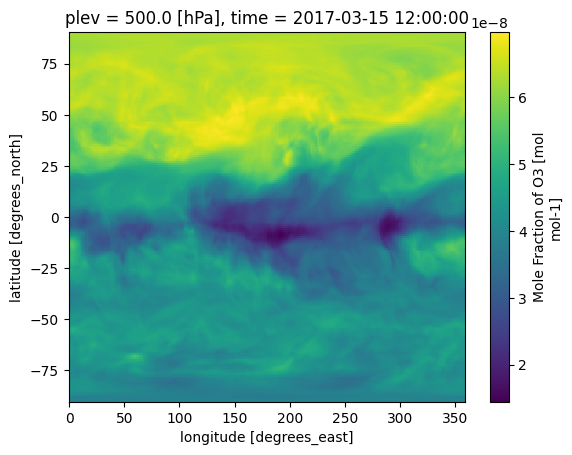

In [5]:
# by value:
ds.o3.sel(time='2017-03-15', plev=500).plot()

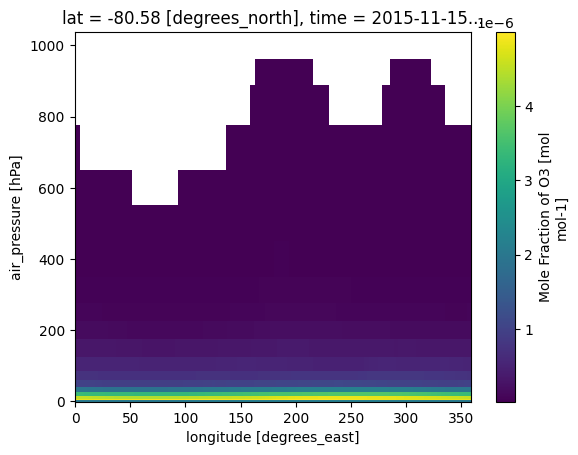

In [6]:
# by index:
ds.o3.isel(time=10, lat=10).plot()

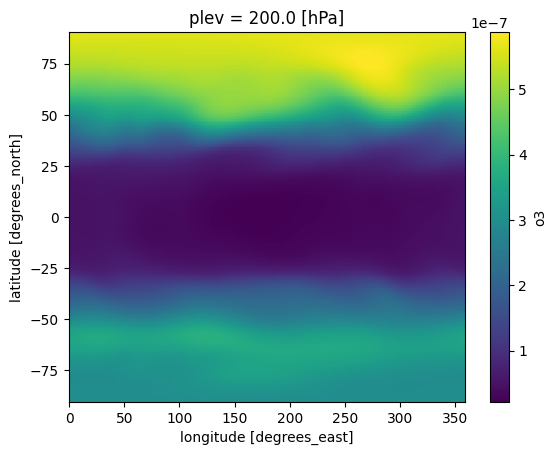

In [7]:
# take average of:
ds.o3.isel(plev=9).mean(dim='time').plot()

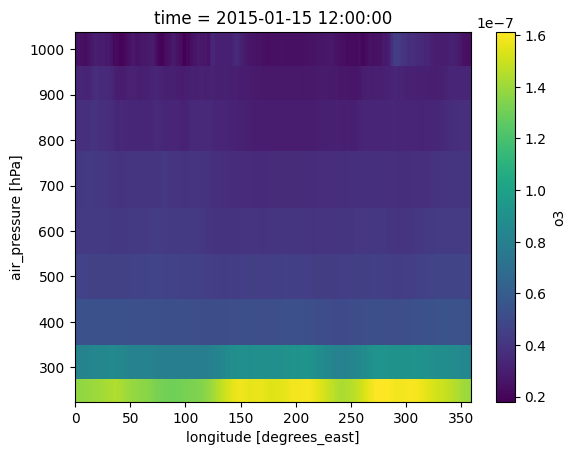

In [8]:
# slicing (selecting a range):
ds.o3.mean(dim='lat').isel(time=0,plev=slice(0,9)).plot()

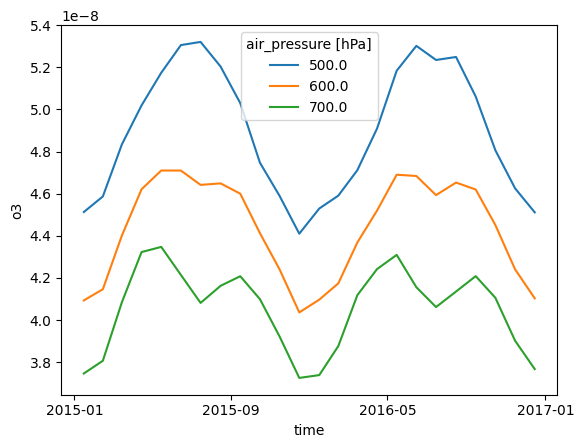

In [9]:
# selecting multiple values
ds.o3.mean(dim='lon').mean(dim='lat').isel(time=slice(0,24), plev=[5,4,3]).plot(hue='plev')

In [10]:
# getting attributes:
ds.o3.time.attrs

{'axis': 'T',
 'bounds': 'time_bnds',
 'standard_name': 'time',
 'title': 'time',
 'type': 'double'}

In [11]:
# converting to string:
print(str(ds.time[6].values))
print(str(ds.plev[3].values)+' hPa')

2015-07-15 12:00:00
700.0 hPa


# Annotation and Customisation

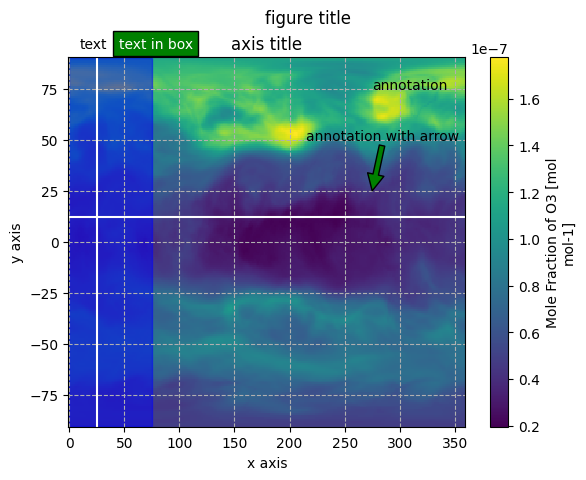

In [129]:
fig = plt.figure()
ax = plt.axes()
graph = data.plot(ax=ax)

# adding text: (coordinates are based on grid coords)
fig.suptitle('figure title')
ax.set(title='axis title', xlabel='x axis', ylabel='y axis')
plt.text(x=10,y=95, s='text')
plt.text(x=45, y=95, s='text in box', color='w', bbox=dict(fc='g'))
ax.annotate(xy=(275,75), text='annotation')
ax.annotate(xy=(275,25), xytext=(215,50), text='annotation with arrow',arrowprops=dict(fc='g'))
# for all text/titles, can change colour, font, style, size and more

#lines:
ax.axhline(y=12, c='w') #horizontal line
ax.axvline(x=25, c='w') #vertical line
ax.grid(True, ls='--')

#other:
rectangle = plt.Rectangle(xy=(0,-90), width=75, height=180, alpha=0.5, color='b')
ax.add_patch(rectangle)
rectangle.set_url('https://www.google.com/') # --> can be a web link or file address in same folder/directory

fig.savefig('annotate.svg') #links in images only work in svg format

# Plots

CPU times: total: 4.5 s
Wall time: 4.71 s


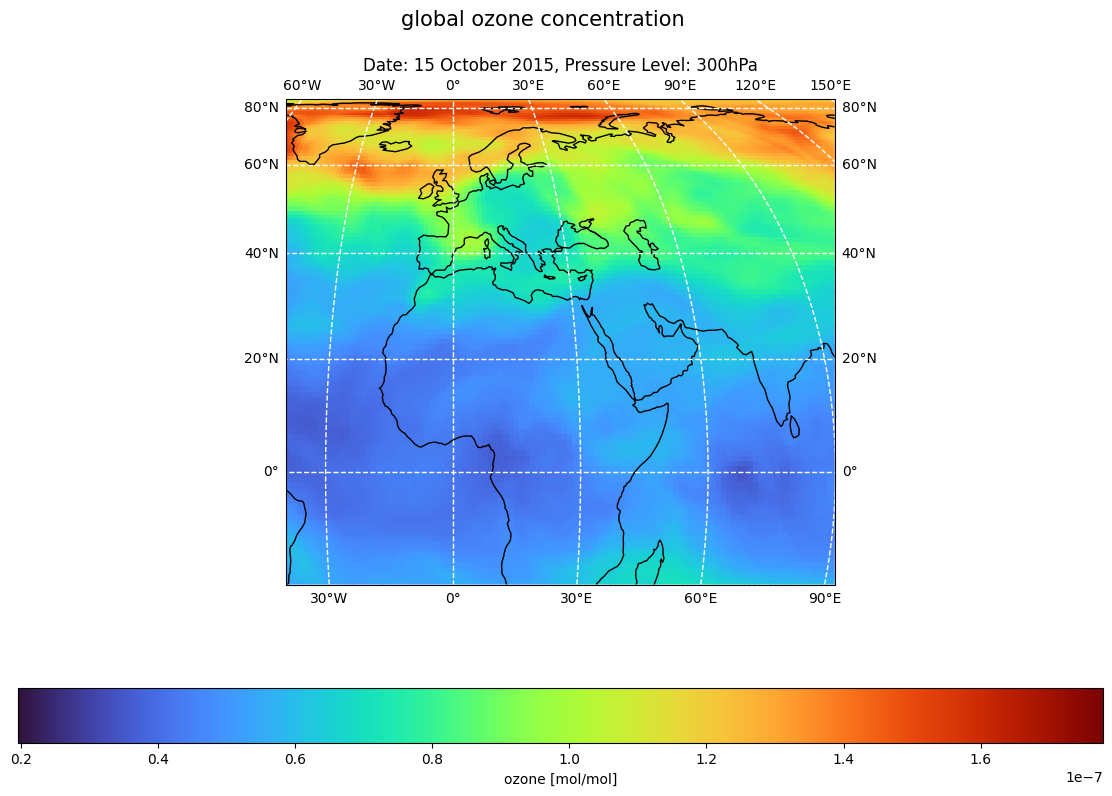

In [12]:
%%time
# location based scalar data

# select data
time, plev = 9, 7
data = ds.o3.isel(time=time, plev=plev) # select by index

# format graph
fig_dims = (14,9)
projection = ccrs.EqualEarth(central_longitude=0)#, central_latitude=-90) # map projection wanted --> central lat only works for globe-like projections
transform = ccrs.PlateCarree() # current projection of data--> if lat/lon then usually PlateCarree

## colors
colormap = 'turbo' # find cmaps at https://matplotlib.org/stable/users/explain/colors/colormaps.html


## Plotting
fig = plt.figure(figsize=fig_dims)
ax = plt.axes(projection=projection)

# # with normal colours
graph = data.plot(ax=ax, transform=transform, cmap=colormap, add_colorbar=False)

# # with filled contour lines
# data, lons = cutil.add_cyclic_point(data, coord=ds.lon) #else would be a white line in middle
# graph = ax.contourf(lons, ds.lat, data, transform=ccrs.PlateCarree(), cmap='Blues')

## details
ax.set_extent([-40,90, -20, 95], crs=ccrs.PlateCarree()) #[minlon, maxlon, minlat, maxlat]
ax.gridlines(color='w', linestyle='--', linewidth=1, draw_labels=True)
ax.coastlines(color='k', linewidth=1)
colorbar = fig.colorbar(graph, ax=ax, location='bottom')

## labels/words
colorbar.set_label(label='ozone [mol/mol]', size=10)
fig.suptitle(t='global ozone concentration', size=15)
date = dt.strptime(str(ds.time[time].values), '%Y-%m-%d %H:%M:%S')
ax.set_title(label='Date: %s, Pressure Level: %.fhPa' %(date.strftime('%d %B %Y'), ds.plev[plev].values))

# save figure
fig.savefig('H:\\Summer24-25\\Jupyter\\Plots_download\\ozone_conc.png')

CPU times: total: 266 ms
Wall time: 818 ms


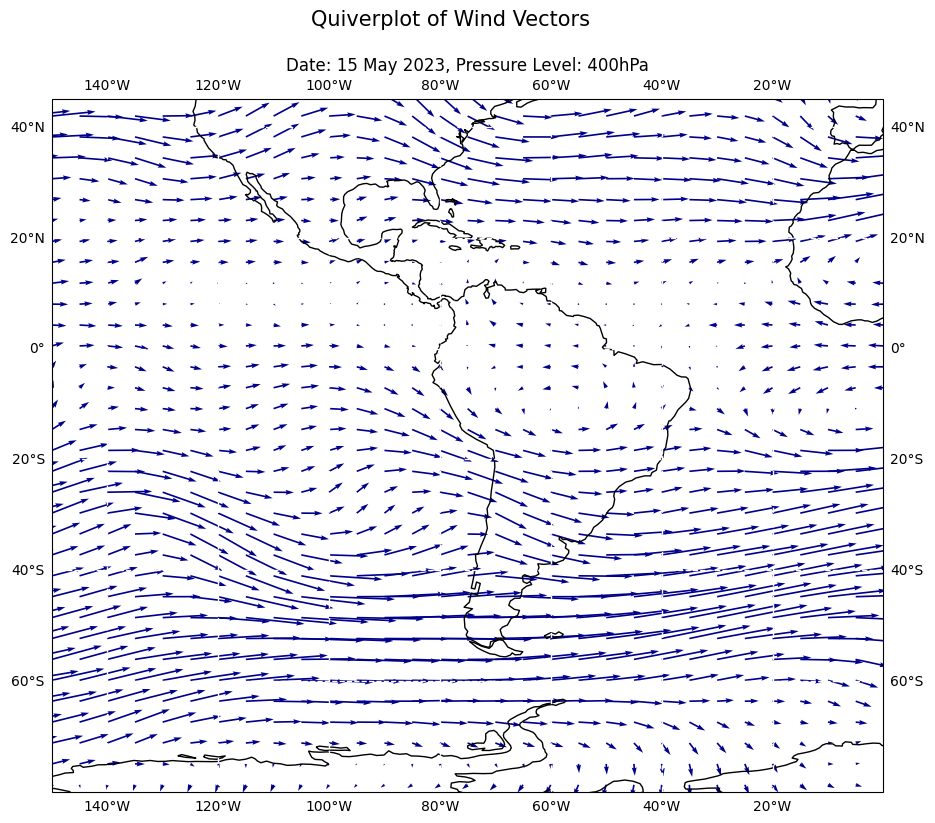

In [13]:
%%time
# location based vector data--> option 1: Quivers

# select and prepare data
time, plev = 100, 6
u = ds.ua.isel(time=time, plev=plev)[::4, ::4] # slicing to get every 4th element
v = ds.va.isel(time=time, plev=plev)[::4, ::4] # which loads faster + renders fewer arrows
windspeed = (v**2 + u**2)**0.5

# format graph
fig_dims = (14,9)
projection = ccrs.PlateCarree(central_longitude=0) # only works with rectangular/square projections
transform = ccrs.PlateCarree() # current projection of data--> if lat/lon then usually PlateCarree

## colors
colormap = 'turbo' # find cmaps at https://matplotlib.org/stable/users/explain/colors/colormaps.html

## Plotting
fig = plt.figure(figsize=fig_dims)
ax = plt.axes(projection=projection)

# plain coloured arrows
qv = ax.quiver(u.lon, u.lat, u, v, color='darkblue', scale=400, width=0.002, transform=ccrs.PlateCarree())

# # arrows coloured by strength
# qv = ax.quiver(u.lon, u.lat, u, v, windspeed, cmap=colormap, scale=400, width=0.002, transform=ccrs.PlateCarree())
# colorbar = fig.colorbar(qv, ax=ax, location='bottom')

## details
ax.set_extent([-150,0, -80, 45], crs=ccrs.PlateCarree()) #[minlon, maxlon, minlat, maxlat]
ax.gridlines(color='w', linestyle='--', linewidth=1, draw_labels=True)
ax.coastlines(color='k', linewidth=1)

## labels/words
colorbar.set_label(label='windspeed (m/s)', size=10)
fig.suptitle(t='Quiverplot of Wind Vectors', size=15)
date = dt.strptime(str(ds.time[time].values), '%Y-%m-%d %H:%M:%S')
ax.set_title(label='Date: %s, Pressure Level: %.fhPa' %(date.strftime('%d %B %Y'), ds.plev[plev].values))

# save figure
fig.savefig('H:\\Summer24-25\\Jupyter\\Plots_download\\vector_quiverplot.png')

CPU times: total: 7.02 s
Wall time: 3.93 s


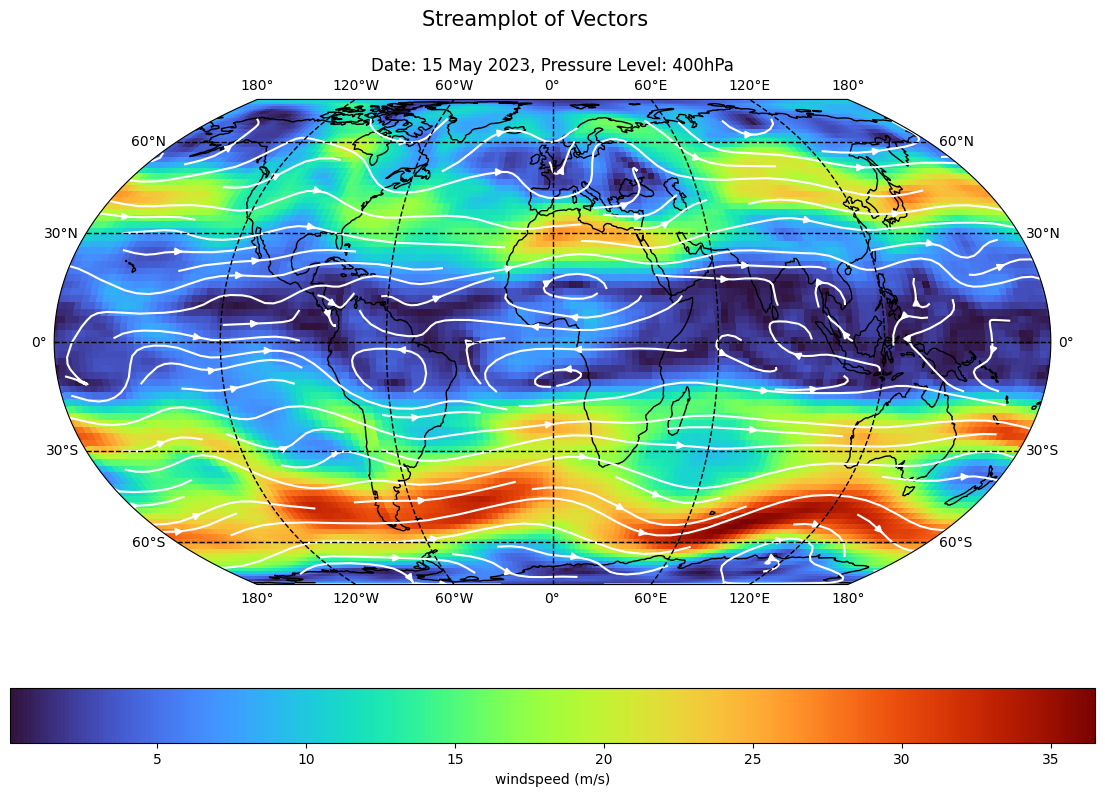

In [29]:
%%time
# location based vector data--> option 2: Streamplot

# select and prepare data
time, plev = 100, 6
u = ds.ua.isel(time=time, plev=plev)[::2, ::2] # slicing to get every 4th element
v = ds.va.isel(time=time, plev=plev)[::2, ::2] # which loads faster + renders fewer arrows
windspeed = (v**2 + u**2)**0.5
lw = 4* (windspeed.values / windspeed.values.max())

# format graph
fig_dims = (14,9)
projection = ccrs.EqualEarth(central_longitude=0)
transform = ccrs.PlateCarree() # current projection of data--> if lat/lon then usually PlateCarree

## colors
colormap = 'turbo' # find cmaps at https://matplotlib.org/stable/users/explain/colors/colormaps.html
norm = mpl.colors.Normalize(vmin=0, vmax=65)


## Plotting
fig = plt.figure(figsize=fig_dims)
ax = plt.axes(projection=projection)


strm = ax.streamplot(u.lon, u.lat, u, v, transform=transform, color='w')
bg = windspeed.plot(ax=ax, cmap=colormap, transform=transform, add_colorbar=False)
# options: 
# Plain: streamplot color='k', comment out windspeed.plot and fig.coorbar lines
# Windspeed= Background Colour --> windspeed.plot(...) with streamplot color='w'
# Windspeed= Streamline Colour --> add color=windspeed.values, cmap=colormap to streamplot call, change colorbar call to strm.lines not bg
# Windspeed= Line Width --> add linewidth=lw to streamplot call
# Continuous Lines --> add broken_streamlines=False to streamplot call
# Also, can change density and linewidth in the streamplot call. 
colorbar = fig.colorbar(bg, ax=ax, location='bottom')

## details
ax.gridlines(color='k', linestyle='--', linewidth=1, draw_labels=True)
ax.coastlines(color='k', linewidth=1)

## labels/words
colorbar.set_label(label='windspeed (m/s)', size=10)
fig.suptitle(t='Streamplot of Vectors', size=15)
date = dt.strptime(str(ds.time[time].values), '%Y-%m-%d %H:%M:%S')
ax.set_title(label='Date: %s, Pressure Level: %.fhPa' %(date.strftime('%d %B %Y'), ds.plev[plev].values))

# save figure
fig.savefig('H:\\Summer24-25\\Jupyter\\Plots_download\\vector_streamplot.png')

CPU times: total: 672 ms
Wall time: 1.37 s


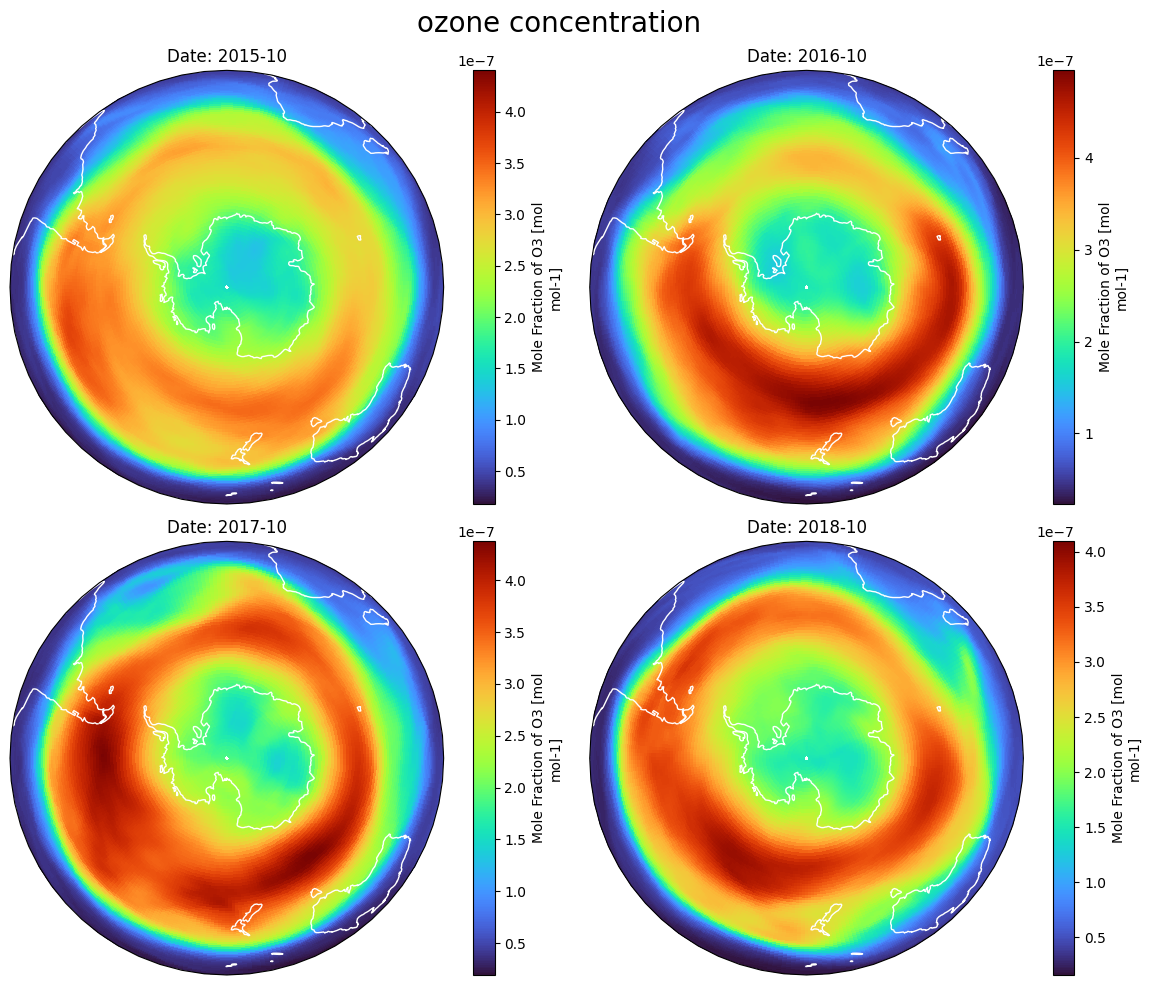

In [132]:
%%time
# Subplots - multiple plots, one figure --> autofit grid to number of times
times = ['2015-10', '2016-10', '2017-10', '2018-10'] # values- use with ds.o3.sel
# times = [9, 21, 33, 45] # indices- use with ds.o3.isel

ds_constants = ds.o3.sel(plev=200) # setting pressure level to 200hPa
colormap = 'turbo'

row,col = math.ceil(len(times)**0.5), round(len(times)**0.5)
fig, axs = plt.subplots(row,col, figsize=(col*6, row*5), layout='tight', subplot_kw=
                        {'projection': ccrs.Orthographic(central_longitude=0.0, central_latitude=-90)})

fig.suptitle('ozone concentration', size=20)
i = 0
for ax in axs.flat:
    if i < len(times):
        # values: 
        ds_constants.sel(time=times[i]).plot(ax=ax, transform=ccrs.PlateCarree(), cmap=colormap)
        ax.set_title('Date: %s' %times[i])

        # indices:
        # ds_constants(time=times[i]).plot(ax=ax, transform=ccrs.PlateCarree(), cmap=colormap)
        # date = dt.strptime(str(ds.time[times[i]].values), '%Y-%m-%d %H:%M:%S')
        # formatted = date.strftime('%B %Y')
        # ax.set_title('Date: %s' %formatted)

        
        ax.coastlines(resolution='110m', color='w')
        i += 1
    else:
        ax.remove()

fig.savefig('vary_subplots_example.png')

CPU times: total: 7.91 s
Wall time: 9.73 s


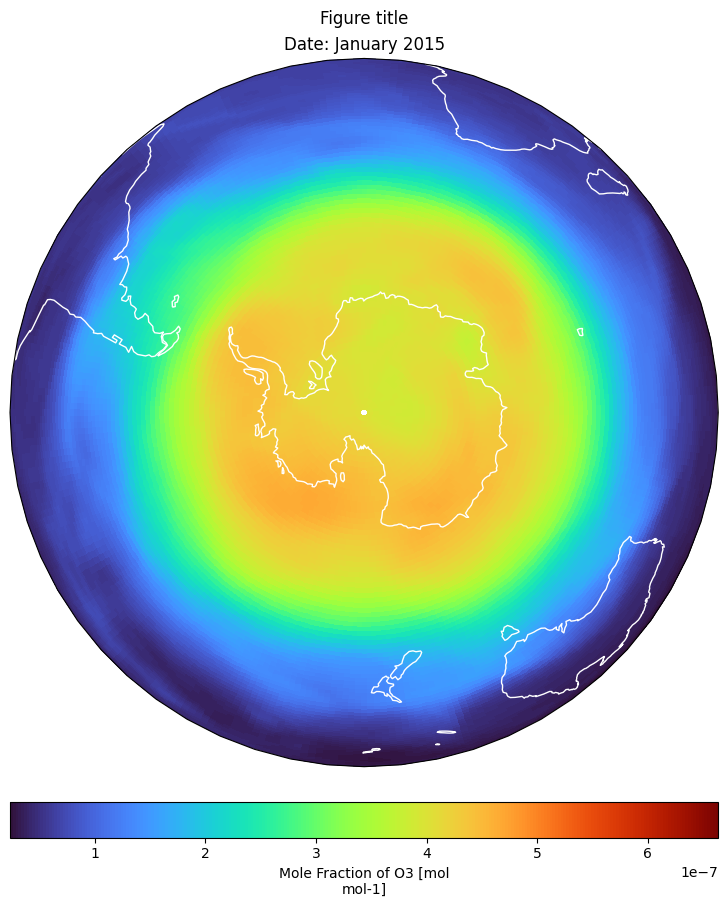

In [176]:
%%time
# animated plots --> animated by timestep -> dataset must have time coordinates

ds_constants = ds.o3.sel(plev=200) # fixing pressure level at 200hPa
fig_dims = (8,9)
num_frames = 25
colormap = 'turbo'
projection = ccrs.Orthographic(central_longitude=0, central_latitude=-90) # map projection wanted

transform = ccrs.PlateCarree() # current projection of data
norm = mpl.colors.Normalize(vmin=4*10**-8, vmax=5*10**-7) # the range of colorbar


fig = plt.figure(figsize=fig_dims, layout='compressed')
ax=plt.axes(projection=projection)

fig.suptitle('Figure title')
colorbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=colormap), ax=ax, location='bottom', label='colorbar')


def animate(num): # function to update each frame

    #unnormalised colours
    fig.clear()
    ax=plt.axes(projection=projection)
    fig.suptitle('Figure title')
    ds_constants.isel(time=num).plot(ax=ax, cmap=colormap, transform=transform, cbar_kwargs={"location": "bottom"})

    # #normalised colours
    # ax.clear() # clear previous plots
    # ds_constants.isel(time=num).plot(ax=ax, cmap=colormap, norm=norm, add_colorbar=False, transform=transform)
    
    date = dt.strptime(str(ds.time[num].values), '%Y-%m-%d %H:%M:%S')
    ax.set_title('Date: %s' %date.strftime('%B %Y'))
    ax.coastlines(color='w')

anim = animation.FuncAnimation(fig, animate, frames=num_frames, interval=200)

anim.save('normnorm.gif', writer='pillow')
